In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [112]:
CI_test=pd.read_csv('C:/Users/NADEEM/Downloads/carInsurance_test.csv')
CI_train=pd.read_csv('C:/Users/NADEEM/Downloads/carInsurance_train.csv')

In [113]:
CI=CI_train.append(CI_test,ignore_index=True)

In [114]:
CI_test.shape

(1000, 19)

In [115]:
CI_train.shape

(4000, 19)

In [116]:
CI.shape

(5000, 19)

In [117]:
CI.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4000.000000
mean,2500.500000,41.266400,0.014200,1506.009400,0.49680,0.130600,15.686200,2.587400,49.295800,0.735200,0.401000
std,1443.520003,11.651428,0.118326,3358.730128,0.50004,0.336996,8.413839,2.973235,107.152847,2.069961,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1250.750000,32.000000,0.000000,113.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2500.500000,39.000000,0.000000,538.000000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3750.250000,49.000000,0.000000,1615.250000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,5000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [118]:
CI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                5000 non-null   int64  
 1   Age               5000 non-null   int64  
 2   Job               4976 non-null   object 
 3   Marital           5000 non-null   object 
 4   Education         4784 non-null   object 
 5   Default           5000 non-null   int64  
 6   Balance           5000 non-null   int64  
 7   HHInsurance       5000 non-null   int64  
 8   CarLoan           5000 non-null   int64  
 9   Communication     3877 non-null   object 
 10  LastContactDay    5000 non-null   int64  
 11  LastContactMonth  5000 non-null   object 
 12  NoOfContacts      5000 non-null   int64  
 13  DaysPassed        5000 non-null   int64  
 14  PrevAttempts      5000 non-null   int64  
 15  Outcome           1201 non-null   object 
 16  CallStart         5000 non-null   object 


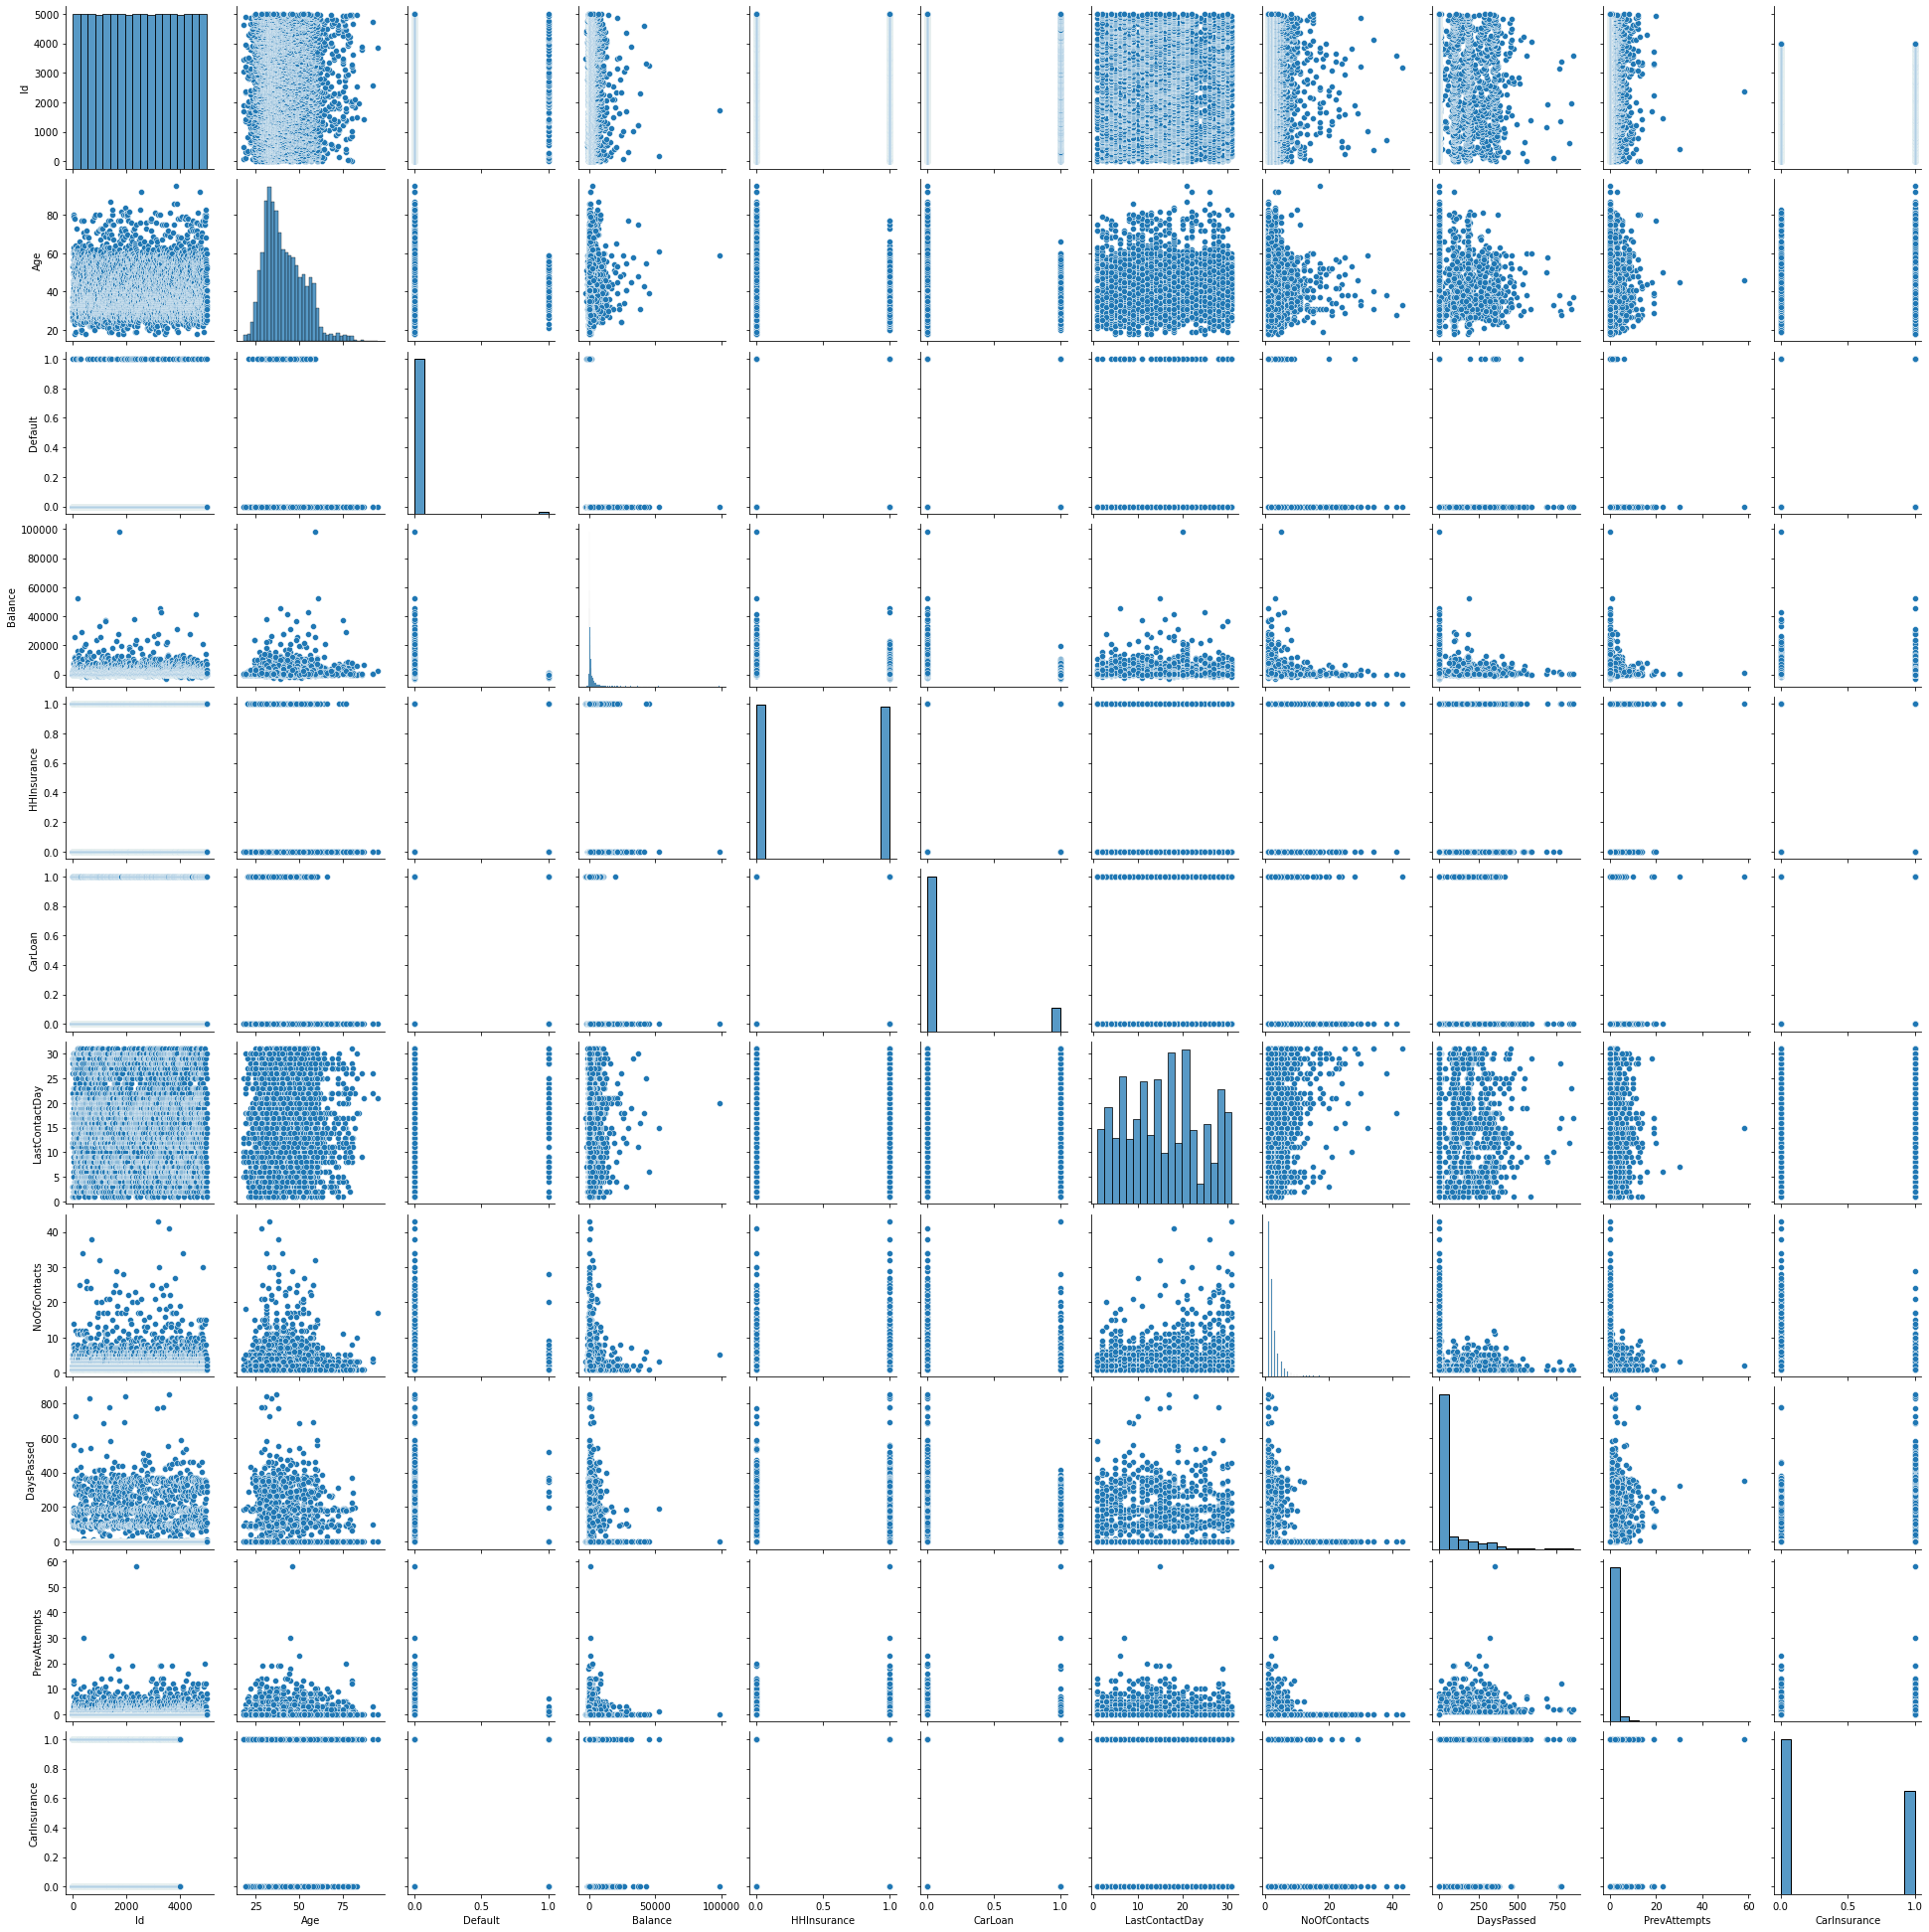

In [119]:
sns.pairplot(CI)

In [120]:
CI.isnull().sum()

Id                     0
Age                    0
Job                   24
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3799
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64

C:\Users\NADEEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

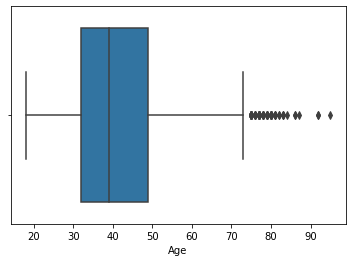

In [121]:
sns.boxplot(CI.Age)

C:\Users\NADEEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Default'>

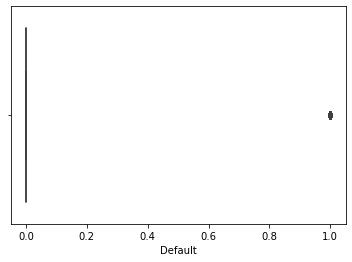

In [122]:
sns.boxplot(CI.Default)

In [123]:
CI['Job'].value_counts(normalize=True)*100

management       22.387460
blue-collar      18.830386
technician       16.539389
admin.           11.776527
services          8.319936
retired           6.551447
self-employed     3.657556
unemployed        3.295820
student           3.175241
entrepreneur      2.994373
housemaid         2.471865
Name: Job, dtype: float64

In [124]:
pd.crosstab(CI['Outcome'],CI['Job'])

Job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
Outcome,,,,,,,,,,,
failure,69,96,16,9,134,29,11,50,19,93,20
other,38,44,2,5,54,14,8,13,20,41,9
success,44,41,3,3,116,54,12,24,23,57,25


In [125]:
CI['Job'].fillna('housemaid',inplace=True)

In [126]:
CI.isnull().sum()

Id                     0
Age                    0
Job                    0
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3799
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64

In [127]:
pd.crosstab(CI['Education'].fillna('miss'),CI['Job'])

Job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
Education,,,,,,,,,,,
miss,15,42,6,17,36,24,7,10,29,26,4
primary,14,350,15,66,30,120,10,29,9,19,32
secondary,476,526,62,42,119,131,55,349,83,553,93
tertiary,81,19,66,22,929,51,110,26,37,225,35


In [128]:
CI['Education'].value_counts()

secondary    2489
tertiary     1601
primary       694
Name: Education, dtype: int64

In [129]:
#CI['Education'].fillna(CI.groupby('Job')['Education'].transform()

In [130]:
CI.tail()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
4995,4996,31,admin.,single,secondary,0,131,1,0,cellular,15,jun,1,-1,0,NaN,13:54:24,13:56:55,NaN
4996,4997,52,management,married,tertiary,0,2635,0,0,cellular,6,sep,1,108,8,success,13:13:38,13:18:51,NaN
4997,4998,46,technician,married,tertiary,0,3009,0,0,cellular,4,aug,2,-1,0,NaN,10:23:35,10:24:33,NaN
4998,4999,60,retired,married,secondary,0,7038,0,0,telephone,7,oct,4,-1,0,NaN,17:01:49,17:04:07,NaN
4999,5000,28,management,single,tertiary,0,957,0,0,cellular,25,may,2,-1,0,NaN,12:15:19,12:30:34,NaN


In [131]:
pd.crosstab([CI.Job,CI.Age],CI.Marital)

Marital         divorced  married  single
Job        Age                           
admin.     22          0        0       1
           23          0        1       1
           24          0        1       6
           25          0        0       9
           26          0        4      10
...                  ...      ...     ...
unemployed 58          1        6       0
           59          2        6       1
           60          0        3       0
           62          0        1       0
           65          0        1       0

[456 rows x 3 columns]

In [132]:
CI["Education"].value_counts(normalize=True)*100

secondary    52.027592
tertiary     33.465719
primary      14.506689
Name: Education, dtype: float64

In [133]:
CI["Default"].value_counts(normalize=True)*100

0    98.58
1     1.42
Name: Default, dtype: float64

In [134]:
CI["Job"].value_counts(normalize=True)*100

management       22.28
blue-collar      18.74
technician       16.46
admin.           11.72
services          8.28
retired           6.52
self-employed     3.64
unemployed        3.28
student           3.16
entrepreneur      2.98
housemaid         2.94
Name: Job, dtype: float64

In [135]:
CI["Age"].value_counts(normalize=True)*100

32    4.50
31    4.34
33    4.34
34    4.14
36    3.92
      ... 
82    0.04
86    0.04
84    0.02
87    0.02
95    0.02
Name: Age, Length: 70, dtype: float64

In [136]:
# CI['DaysPassed'].value_counts().isnull()

In [137]:
pd.crosstab([CI.Outcome],CI.Communication)

Communication,cellular,telephone
Outcome,,
failure,502,42
other,222,25
success,370,33


In [138]:
CI['Communication'].value_counts(normalize=True)*100

cellular     91.023988
telephone     8.976012
Name: Communication, dtype: float64

In [139]:
CI['Outcome'].value_counts(normalize=True)*100

failure    45.628643
success    33.721898
other      20.649459
Name: Outcome, dtype: float64

In [140]:
CI['Job']=CI['Job'].fillna("housemaid")

In [141]:
CI.isnull().sum()

Id                     0
Age                    0
Job                    0
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3799
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64

In [142]:
pd.crosstab([CI.Education],CI.Marital)

Marital,divorced,married,single
Education,,,
primary,95,505,94
secondary,299,1453,737
tertiary,177,810,614


In [143]:
CI.groupby('Outcome')['Age'].count()

Outcome
failure    548
other      248
success    405
Name: Age, dtype: int64

In [144]:
pd.crosstab([CI.Marital],CI.Education)

Education,primary,secondary,tertiary
Marital,,,
divorced,95,299,177
married,505,1453,810
single,94,737,614


In [145]:
CI['Outcome'].isnull().sum()

3799

In [146]:
CI['Communication'].value_counts()
CI['Communication'].fillna('None',inplace=True)

In [147]:
CI['Communication'].value_counts()

cellular     3529
None         1123
telephone     348
Name: Communication, dtype: int64

In [148]:
CI['Communication'].isnull().sum()

0

In [149]:
CI['Education'].fillna('secondary',inplace=True)

In [150]:
CI.isnull().sum()

Id                     0
Age                    0
Job                    0
Marital                0
Education              0
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication          0
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3799
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64

C:\Users\NADEEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

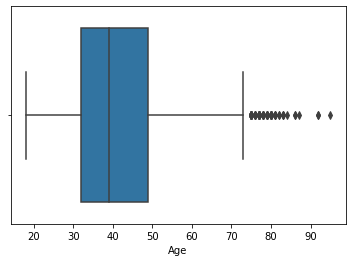

In [151]:
sns.boxplot(CI['Age'])

C:\Users\NADEEM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

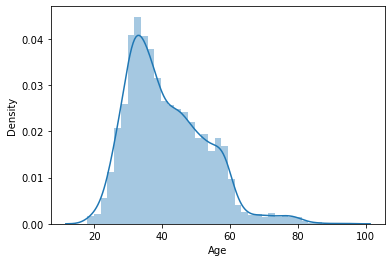

In [152]:
sns.distplot(CI['Age'])

In [153]:
m=np.mean(CI['Age'])
sd=np.std(CI['Age'])

In [154]:
m+3*sd

76.21718939537703

In [155]:
(CI[CI.Age>m+3*sd]['Age'].count()/CI.shape[0])*100

1.08

In [156]:
CI[CI.Age>m+3*sd]['Age'].count()/CI.shape[0]

0.0108

In [157]:
CI.shape

(5000, 19)

In [158]:
CI[CI.Age>m+3*sd]['Age'].count()

54

In [159]:
p99=np.percentile(CI['Age'],99)

In [160]:
p99

77.0

In [161]:
print(CI[CI.Age>p99]['Age'].count())

41


In [162]:
print((CI[CI.Age>p99]['Age'].count()/CI.shape[0])*100)

0.8200000000000001


In [163]:
CI['Age_m']=np.where(CI['Age']>p99,p99,CI['Age'])

C:\Users\NADEEM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_m', ylabel='Density'>

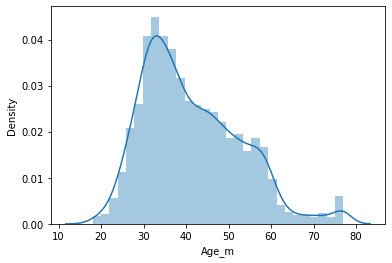

In [164]:
sns.distplot(CI['Age_m'])

In [165]:
CI[['Age','Age_m']].describe()

,Age,Age_m
count,5000.000000,5000.000000
mean,41.266400,41.230200
std,11.651428,11.527297
min,18.000000,18.000000
25%,32.000000,32.000000
50%,39.000000,39.000000
75%,49.000000,49.000000
max,95.000000,77.000000


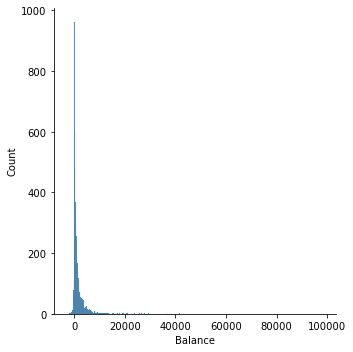

In [166]:
sns.displot(CI.Balance)

C:\Users\NADEEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

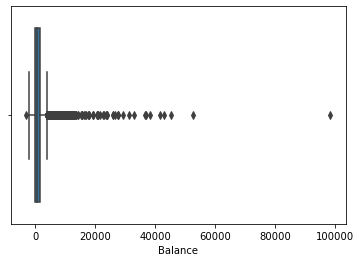

In [167]:
sns.boxplot(CI['Balance'])

In [168]:
CI['Balance'].describe()

count     5000.000000
mean      1506.009400
std       3358.730128
min      -3058.000000
25%        113.000000
50%        538.000000
75%       1615.250000
max      98417.000000
Name: Balance, dtype: float64

In [169]:
np.mean(CI['Balance'])+3*np.std(CI["Balance"])

11581.19211537571

C:\Users\NADEEM\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\NADEEM\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\NADEEM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OverflowError: cannot convert float infinity to integer

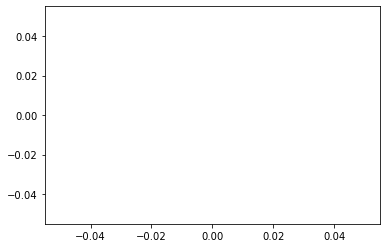

In [170]:
sns.distplot(np.log(CI['Balance'])) # can't take log as it might contain 0's which results to infinte values.

C:\Users\NADEEM\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

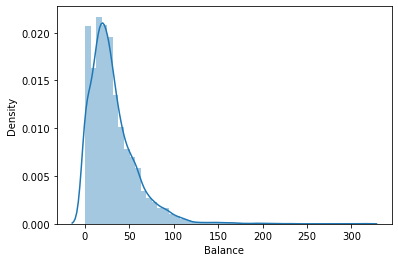

In [171]:
sns.distplot(np.sqrt(CI['Balance']))

C:\Users\NADEEM\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\NADEEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

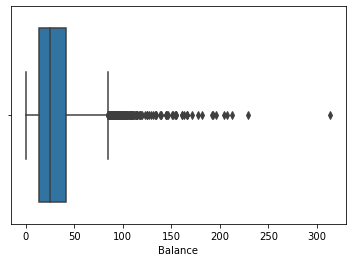

In [172]:
sns.boxplot(np.sqrt(CI['Balance']))

C:\Users\NADEEM\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

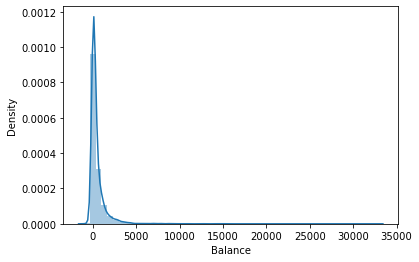

In [173]:
sns.distplot((CI['Balance'])**1/3)

C:\Users\NADEEM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

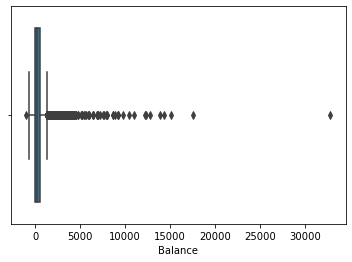

In [174]:
sns.boxplot((CI['Balance'])**1/3)

In [175]:
balance_sqrt=np.where(CI['Balance']<0,0,np.sqrt(CI['Balance']))

C:\Users\NADEEM\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [176]:
np.percentile(balance_sqrt,99)

114.07892005098927

In [177]:
np.percentile(balance_sqrt,99)

114.07892005098927

In [178]:
np.sqrt(CI['Balance']).isnull().sum()

337

In [179]:
pd.DataFrame(balance_sqrt).isnull().sum()

0    0
dtype: int64

In [ ]:
balance_sqrt.isnull().sum() # it doesn't works beacuse isnull works only in pd with func.

In [180]:
CI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                5000 non-null   int64  
 1   Age               5000 non-null   int64  
 2   Job               5000 non-null   object 
 3   Marital           5000 non-null   object 
 4   Education         5000 non-null   object 
 5   Default           5000 non-null   int64  
 6   Balance           5000 non-null   int64  
 7   HHInsurance       5000 non-null   int64  
 8   CarLoan           5000 non-null   int64  
 9   Communication     5000 non-null   object 
 10  LastContactDay    5000 non-null   int64  
 11  LastContactMonth  5000 non-null   object 
 12  NoOfContacts      5000 non-null   int64  
 13  DaysPassed        5000 non-null   int64  
 14  PrevAttempts      5000 non-null   int64  
 15  Outcome           1201 non-null   object 
 16  CallStart         5000 non-null   object 


In [181]:
CI['Balance_m']=balance_sqrt

In [182]:
CI1=CI.copy()

In [183]:
CI1['CallStart_m']=pd.to_datetime(CI1['CallStart'],format='%H:%M:%S')

In [184]:
CI1['CallEnd_m']=pd.to_datetime(CI1['CallEnd'],format='%H:%M:%S')

In [185]:
CI1['Duration']=CI1['CallEnd_m']-CI1['CallStart_m']

In [186]:
CI1['Duration'].dtype

dtype('<m8[ns]')

In [188]:
CI1['CallStart_m'].head()

0   1900-01-01 13:45:20
1   1900-01-01 14:49:03
2   1900-01-01 16:30:24
3   1900-01-01 12:06:43
4   1900-01-01 14:35:44
Name: CallStart_m, dtype: datetime64[ns]

In [189]:
CI1.drop(['Id','Age','Balance','Outcome','CallStart','CallStart_m','CallEnd_m','CallEnd','Duration'],axis=1,inplace=True)

In [192]:
CI1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job               5000 non-null   object 
 1   Marital           5000 non-null   object 
 2   Education         5000 non-null   object 
 3   Default           5000 non-null   int64  
 4   HHInsurance       5000 non-null   int64  
 5   CarLoan           5000 non-null   int64  
 6   Communication     5000 non-null   object 
 7   LastContactDay    5000 non-null   int64  
 8   LastContactMonth  5000 non-null   object 
 9   NoOfContacts      5000 non-null   int64  
 10  DaysPassed        5000 non-null   int64  
 11  PrevAttempts      5000 non-null   int64  
 12  CarInsurance      4000 non-null   float64
 13  Age_m             5000 non-null   float64
 14  Balance_m         5000 non-null   float64
dtypes: float64(3), int64(7), object(5)
memory usage: 586.1+ KB


In [193]:
CI1.isnull().sum()

Job                    0
Marital                0
Education              0
Default                0
HHInsurance            0
CarLoan                0
Communication          0
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
CarInsurance        1000
Age_m                  0
Balance_m              0
dtype: int64

In [195]:
CI1['Job'].value_counts()

management       1114
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         147
Name: Job, dtype: int64

In [196]:
CI2=pd.get_dummies(CI1,drop_first=True)

In [197]:
CI2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Default                  5000 non-null   int64  
 1   HHInsurance              5000 non-null   int64  
 2   CarLoan                  5000 non-null   int64  
 3   LastContactDay           5000 non-null   int64  
 4   NoOfContacts             5000 non-null   int64  
 5   DaysPassed               5000 non-null   int64  
 6   PrevAttempts             5000 non-null   int64  
 7   CarInsurance             4000 non-null   float64
 8   Age_m                    5000 non-null   float64
 9   Balance_m                5000 non-null   float64
 10  Job_blue-collar          5000 non-null   uint8  
 11  Job_entrepreneur         5000 non-null   uint8  
 12  Job_housemaid            5000 non-null   uint8  
 13  Job_management           5000 non-null   uint8  
 14  Job_retired             

## Modelling

In [199]:
CI_notnull = CI2[CI2['CarInsurance'].notnull()]

In [200]:
CI_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Default                  4000 non-null   int64  
 1   HHInsurance              4000 non-null   int64  
 2   CarLoan                  4000 non-null   int64  
 3   LastContactDay           4000 non-null   int64  
 4   NoOfContacts             4000 non-null   int64  
 5   DaysPassed               4000 non-null   int64  
 6   PrevAttempts             4000 non-null   int64  
 7   CarInsurance             4000 non-null   float64
 8   Age_m                    4000 non-null   float64
 9   Balance_m                4000 non-null   float64
 10  Job_blue-collar          4000 non-null   uint8  
 11  Job_entrepreneur         4000 non-null   uint8  
 12  Job_housemaid            4000 non-null   uint8  
 13  Job_management           4000 non-null   uint8  
 14  Job_retired             

In [201]:
from sklearn.model_selection import train_test_split

In [203]:
Y=CI_notnull['CarInsurance']

In [222]:
A=CI2['CarInsurance']

In [204]:
X=CI_notnull.drop('CarInsurance',1)

In [223]:
B=CI2.drop('CarInsurance',1)

In [205]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Default                  4000 non-null   int64  
 1   HHInsurance              4000 non-null   int64  
 2   CarLoan                  4000 non-null   int64  
 3   LastContactDay           4000 non-null   int64  
 4   NoOfContacts             4000 non-null   int64  
 5   DaysPassed               4000 non-null   int64  
 6   PrevAttempts             4000 non-null   int64  
 7   Age_m                    4000 non-null   float64
 8   Balance_m                4000 non-null   float64
 9   Job_blue-collar          4000 non-null   uint8  
 10  Job_entrepreneur         4000 non-null   uint8  
 11  Job_housemaid            4000 non-null   uint8  
 12  Job_management           4000 non-null   uint8  
 13  Job_retired              4000 non-null   uint8  
 14  Job_self-employed       

In [224]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Default                  5000 non-null   int64  
 1   HHInsurance              5000 non-null   int64  
 2   CarLoan                  5000 non-null   int64  
 3   LastContactDay           5000 non-null   int64  
 4   NoOfContacts             5000 non-null   int64  
 5   DaysPassed               5000 non-null   int64  
 6   PrevAttempts             5000 non-null   int64  
 7   Age_m                    5000 non-null   float64
 8   Balance_m                5000 non-null   float64
 9   Job_blue-collar          5000 non-null   uint8  
 10  Job_entrepreneur         5000 non-null   uint8  
 11  Job_housemaid            5000 non-null   uint8  
 12  Job_management           5000 non-null   uint8  
 13  Job_retired              5000 non-null   uint8  
 14  Job_self-employed       

In [206]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=50)

In [230]:
X_train.shape

(3200, 36)

In [226]:
Y_train.shape

(3200,)

In [227]:
X_test.shape

(800, 36)

In [211]:
from sklearn.linear_model import LogisticRegression

In [212]:
lr=LogisticRegression()

In [213]:
lr.fit(X_train,Y_train)

C:\Users\NADEEM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [215]:
Pred_Y=lr.predict(X_train)

In [216]:
Pred_Y

array([1., 0., 1., ..., 1., 0., 1.])

In [217]:
Pred_Y.shape

(3200,)

In [218]:
pd.crosstab(Y_train,Pred_Y)

col_0,0.0,1.0
CarInsurance,,
0.0,1580,330
1.0,613,677


In [219]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score

In [220]:
accuracy=accuracy_score(Y_train,Pred_Y)
f1_score=f1_score(Y_train,Pred_Y)
prec_score=precision_score(Y_train,Pred_Y)
recall=recall_score(Y_train,Pred_Y)
roc_auc=roc_auc_score(Y_train,Pred_Y)

In [221]:
print("Accurace:",accuracy)
print("F1:",f1_score)
print("Precision:",prec_score)
print("Recall:",recall)
print("ROC AUC:",roc_auc)

Accurace: 0.7053125
F1: 0.5894645189377449
Precision: 0.6722939424031777
Recall: 0.5248062015503876
ROC AUC: 0.67601566622022
